# Question 9 (parametric surface)

The question concerns the geometry of a curved 2-D surface embedded in 'ordinary' 3-D space. The surface is defined parametrically by $$\mathbf{r}(u,v) = [u^2 + v, 2uv, u+v^2]^T$$ and, whilst it is not required in answering the examples paper, the question of what this surface looks like naturally arises. 

A few insights can be made more-or-less by inspection. Taking $(x,y,z)$ as the normal 3-D co-ordinate system:
* The lines $u=0$ and $v=0$ correspond to two different parabolas in the $x,z$ plane at $y=0$.
* Swapping $u$ and $v$ swaps $x$ and $z$ but leave $y$ unchanged, therefore:
    * The line corresponding to $u=v$ lies in the plane $x=z$ and 
    * the whole surface has reflective symmetry in this plane.

However, getting much further than this proves challenging, so we resort to computing and plotting the surface.


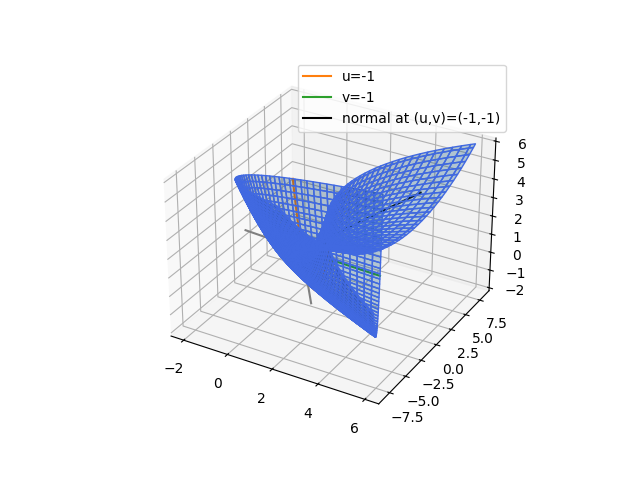

In [18]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib widget

def r(u, v):
    """Function x,y,z = r(u,v) defines the surface considered in maths examples 
    paper 10 question 9."""
    x = u**2 + v
    y = 2 * u * v
    z = u + v**2
    return x,y,z

def dr_du(u, v):
    x = 2 * u
    y = 2 * v
    z = 1
    return x,y,z

def dr_dv(u, v):
    x = 1
    y = 2 * u
    z = 2 * v
    return x,y,z

# open a figure and set it up for 3-D projection
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# np.linspace(start, stop, numvals) returns a 1-D array of length numvals with
# values evenly spaced from start to stop (inclusive of the endpoints, so 
# np.linspace(1,2,3) would return [1, 1.5, 2])

u = np.linspace(-2, 2, 100)
v = np.linspace(-2, 2, 100)

# np.meshgrid() returns two 2-D arrays of size [len(v), len(u)]. Each element of u is 
# repeated to fill the corresponding column of U, whilst each element of v fills the
# corresponding row of V. Thus U becomes a grid of values increasing left to right but
# constant top to bottom, whilst V is a grid increasing top to bottom, and constant
# left to right.

U, V = np.meshgrid(u,v)

# Plot the surface. Remember that nothing will actually appear until we call plt.show() below.
Xs, Ys, Zs = r(U, V)
ax.plot_surface(Xs, Ys, Zs, edgecolor='royalblue', alpha=0.3)       # alpha=0.3 makes the surface semi-transparent. 

# Mark the point corresponding to (u,v)=(-1,-1)
x,y,z = r(-1,-1)
ax.plot(x,y,z,'o',c='black')

# the lines corresponding to u=-1 and v=-1
Xmv, Ymv, Zmv = r(np.full_like(u, -1), v)           # np.full_like(u, -1) return an array the same size as u but filled with the value -1
ax.plot(Xmv, Ymv, Zmv, label='u=-1')

Xum, Yum, Zum = r(u, np.full_like(v, -1))
ax.plot(Xum, Yum, Zum, label='v=-1')

# The code that follows to plot tangent and normal vectors is a bit messy-looking, but just
# draws three line segments from (x,y,z) to (x,y,z)+(dx,dy,dz)

# the tangents at (u,v)=(-1,-1)
drdu_x, drdu_y, drdu_z = dr_du(-1, -1)
ax.plot([x, x+drdu_x], [y, y+drdu_y], [z, z+drdu_z], c='grey')

drdv_x, drdv_y, drdv_z = dr_dv(-1, -1)
ax.plot([x, x+drdv_x], [y, y+drdv_y], [z, z+drdv_z], c='grey')

# the surface normal at (u,v)=(-1,-1) is the cross-product of the tangent vectors
sn = np.cross(np.array([drdu_x, drdu_y, drdu_z]), np.array([drdv_x, drdv_y, drdv_z]))
ax.plot([x, x+sn[0]], [y, y+sn[1]], [z, z+sn[2]], c='black', label='normal at (u,v)=(-1,-1)')

ax.legend()
plt.show()
